<a href="https://colab.research.google.com/github/renatagomezc/Regresion-No-Lineal-y-Regresion-Logistica/blob/main/Act_7_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Actividad 7.1 (Regresión No Lineal)**

*Integrantes*
- Carolina Solis Flores  A01708072
- Maria Fernanda Martinez Ríos A01067198
- Renata Pilar Gómez Castillo A01351806
- Jose Ignacio Hernández Rodríguez A01703130

In [2]:
#Cargamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as special
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.metrics import r2_score

In [3]:
gastos_20 = pd.read_excel('gastos_c2020_clean.xlsx', index_col=0)

In [4]:
gastos_21 = pd.read_excel('gastos_c2021_clean.xlsx', index_col=0)
gastos_22 = pd.read_excel('gastos_c2022_clean.xlsx', index_col=0)

In [5]:
X_ =[]
Y_ = []
modelo_ = []
Año_ = []
deter_ = []

# **2020**

### **MODELO lineal**

In [16]:
modelo_.append('Lineal')
X_.append('IVA')
Y_.append('TOTAL MX')

<Axes: xlabel='IVA', ylabel='TOTAL MX'>

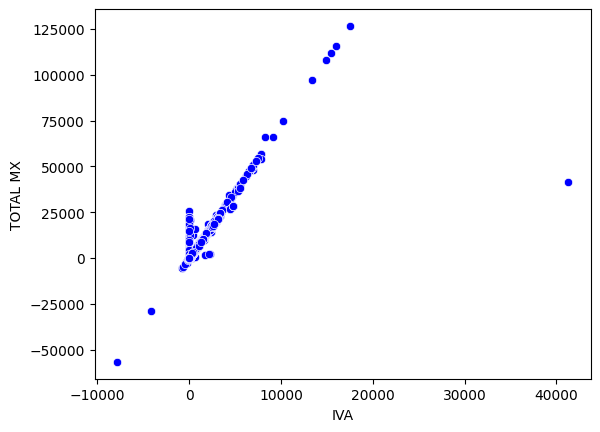

In [6]:
#Imprimimos el scatter plot entre la variable dependiente independiente 
from turtle import color
sns.scatterplot(x=gastos_20['IVA'], y=gastos_20['TOTAL MX'], color="blue", data=gastos_20)

In [7]:
Vars_Indep= gastos_20[['IVA']]
Var_Dep= gastos_20['TOTAL MX']

In [8]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [9]:
type(model)

sklearn.linear_model._base.LinearRegression

In [10]:
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [17]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['IVA'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([5.35782259]),
 'rank_': 1,
 'singular_': array([78227.70012253]),
 'intercept_': 975.606184330923}

**Modelo matemático = 5.35782259x + 975.606184330923**

In [18]:
model.score(Vars_Indep,Var_Dep)

0.7617279340475278

In [19]:
#Predecimos los valores 
y_pred= model.predict(X=gastos_20[['IVA']])
y_pred

array([13021.49154743,  1395.65947505,  1142.77024901, ...,
        1116.0347143 ,   975.60618433,   975.60618433])

In [20]:
gastos_20.insert(0, 'Predicciones', y_pred)
gastos_20
     

,Predicciones,FECHA,FOLIO,RFC,PROVEEDOR,TIPO GASTO,GASTO,DESCRIPCION,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT,STATUS
0,13021.491547,2020-01-01,39408,ARE080115PBA,ARSI RENTA SA DE CV,MAQUINARIA,0,"Descripción: REVOLVEDORA, Modelo: ULTRAMP9A, M...",1,0.00,2248.28,0.0,0.0,2248.28,16300.00,Vigente
1,1395.659475,2020-01-01,0001010100750847116902,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,0,COMISION COBRADA,1,490.00,78.40,0.0,0.0,568.40,568.40,Vigente
2,1142.770249,2020-01-01,0001010100752163714102,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,0,COMISION COBRADA,1,195.00,31.20,0.0,0.0,226.20,226.20,Vigente
3,10143.269254,2020-01-01,3663,PSS120625C86,PROMOTORA DE SERVICIOS Y SOLUCIONES EMPRESARIA...,HONORARIOS CONTABLES,0,HONORARIOS CONTABLES\nDEL MES DE ENERO DEL 2020.,1,10694.25,1711.08,0.0,0.0,12405.33,12405.33,Vigente
4,975.606184,2020-01-01,2849,ENA7006081P0,ELECTROTERMICA NACIONAL SA DE CV,COMPRAS,0,Pago,1,0.00,0.00,0.0,0.0,0.00,0.00,Vigente
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3337,1083.887779,2020-12-01,125834,SQS110113MU0,SERVICIO QUINTANA SUR S.A DE C.V,COMBUSTIBLE,G VTA,32011 MAGNA,1,129.79,20.21,0.0,0.0,150.00,150.00,Vigente
3338,2934.265387,2020-12-01,37652,PSQ790724C90,"CIA. PERIODISTICA DEL SOL DE QUERETARO, S.A. D...",PUBLICIDAD,G VTA,82101504-PUBLICIDAD EN PERIODICOSCALOR Y CONTROL,1,2284.80,365.57,0.0,0.0,2650.37,2650.37,Vigente
3339,1116.034714,2020-12-01,160,SQX981027RY5,"SUPER Q, S. A. DE C. V.",ALIMENTOS,G VTA,REF VICTORIA GROSELLA 3 LT PET NR,1,163.79,26.21,0.0,0.0,190.00,190.00,Vigente
3340,975.606184,2020-12-01,634875,BIN940223KE0,"BANCO INVEX, S.A., INSTITUCION DE BANCA MULTIP...",COMISION BANCARIA,G FINA,COMISIONES E INTERESES,1,0.00,0.00,0.0,0.0,0.00,0.00,Vigente


<Axes: xlabel='IVA', ylabel='TOTAL MX'>

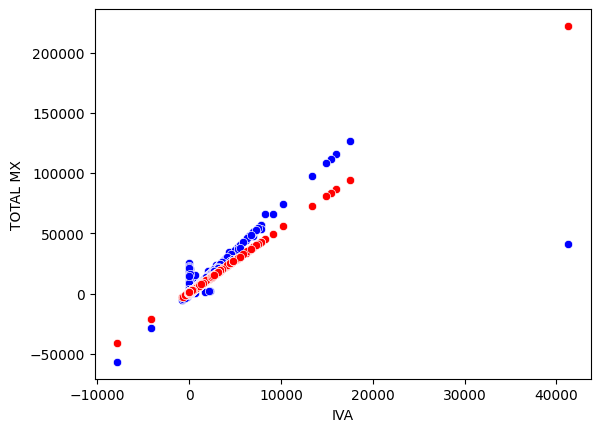

In [21]:
sns.scatterplot(x=gastos_20['IVA'], y=gastos_20['TOTAL MX'], color="blue", data=gastos_20)
sns.scatterplot(x=gastos_20['IVA'], y='Predicciones', color="red", data=gastos_20)

In [22]:
#coeficiente de determinación
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
deter_.append(coef_Deter)
coef_Deter

0.7617279340475278

In [24]:
#Coeficiente de correlación
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.8727702641861304

### **Modelo no lineal (cuadrático)**

In [25]:
modelo_.append('No lineal Cuadrático')
X_.append('IVA')
Y_.append('TOTAL MX')

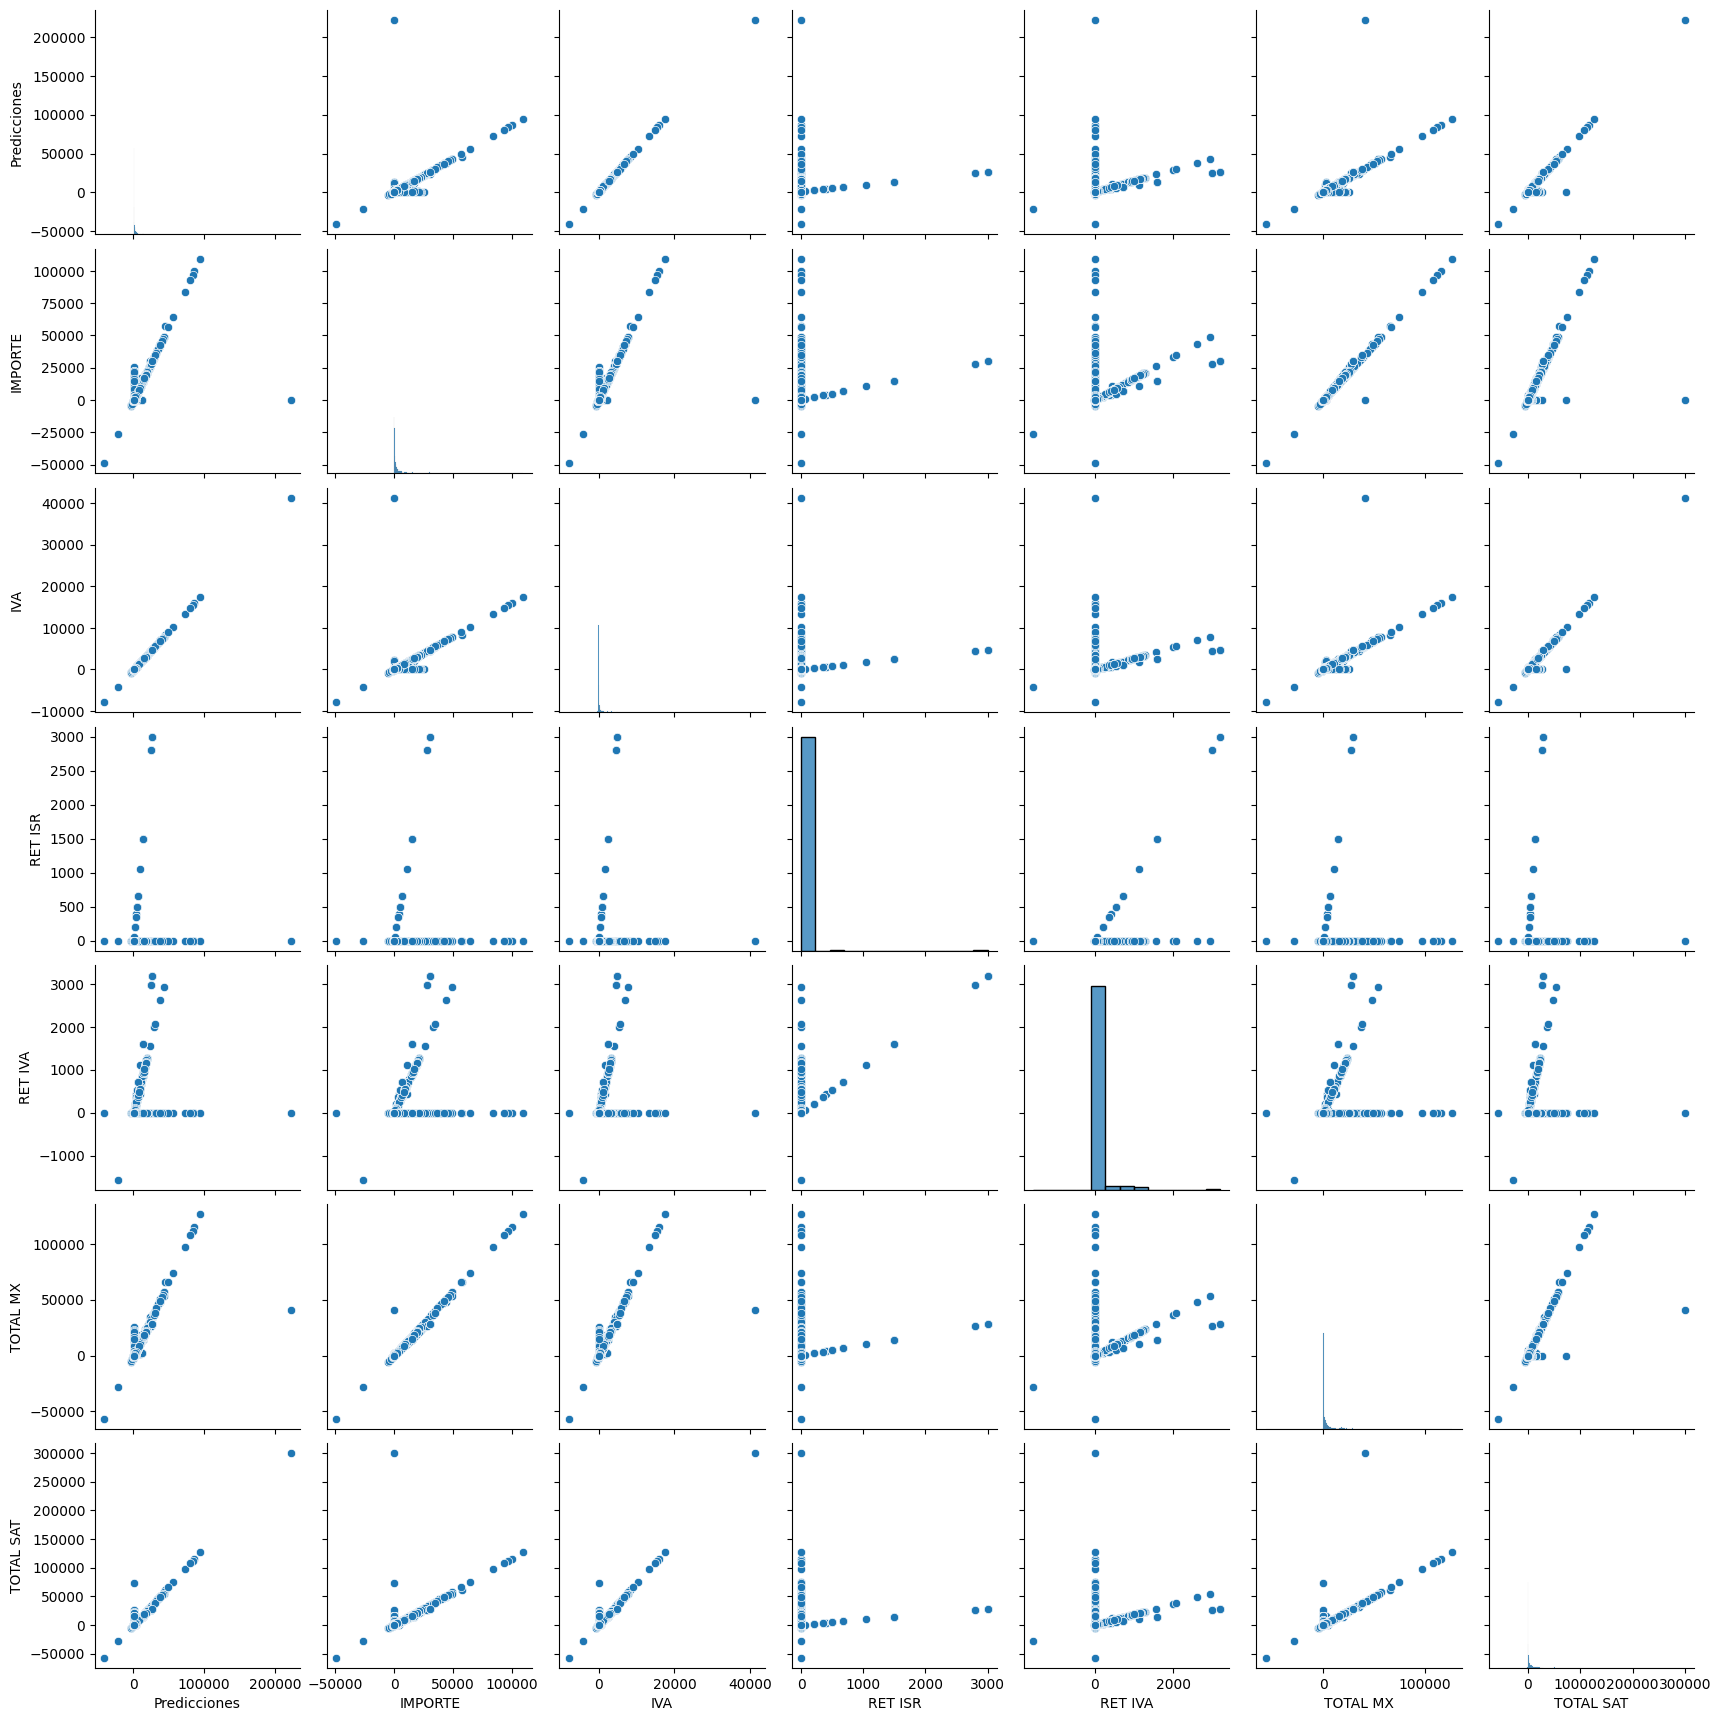

In [26]:
#Graficamos todas las dispersiones entre todas las variables
sns.pairplot(gastos_20)

In [27]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= gastos_20[['IVA']]
Var_Dep= gastos_20['TOTAL MX']

In [28]:
#Redefinimos las variables 
x= Vars_Indep
y= Var_Dep

In [29]:
def  func1 (x, a, b, c):
     return a*x**2 + b*x + c

In [30]:
#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, gastos_20['IVA'], gastos_20['TOTAL MX'])

In [31]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros

array([-1.58743658e-04,  8.02319895e+00,  8.57700433e+00])

In [32]:
#Creamos el modelo de predicción con los parámetros obtenidos 
parametros, _ = curve_fit(func1, gastos_20['IVA'], gastos_20['TOTAL MX'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a * x ** 2 + b * x + c

In [33]:
#Calculamos las predicciones y reestructuramos el vector de predicciones
yfit1

,IVA
0,17244.563178
1,636.620075
2,258.746284
3,13272.143413
4,8.577004
...,...
3337,170.661017
3338,2920.403116
3339,218.755998
3340,8.577004


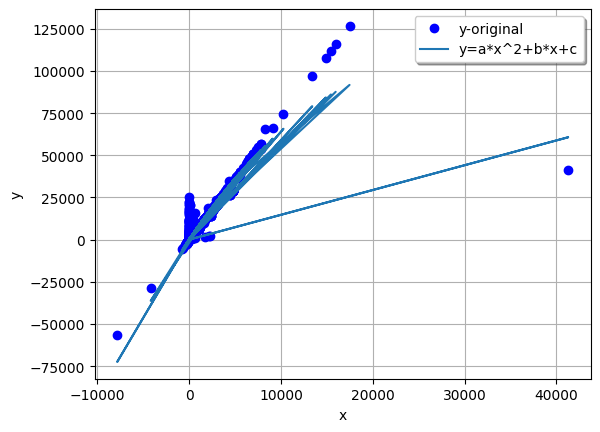

In [34]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="y=a*x^2+b*x+c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [35]:
#Calculamos el coeficiente de determinación del modelo

R2 = r2_score(y, yfit1) 
deter_.append(R2)
R2

0.9329074207969074

#**2021**

In [37]:
modelo_.append('No Lineal Cuadrática')
X_.append('IVA')
Y_.append('TOTAL MX')

## **Regresión No Lineal - Cuadratica**

Exception ignored in: <function TransformNode.set_children.<locals>.<lambda> at 0x7fea56d15ea0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/matplotlib/transforms.py", line 209, in <lambda>
    self, lambda _, pop=child._parents.pop, k=id(self): pop(k))
KeyboardInterrupt: 


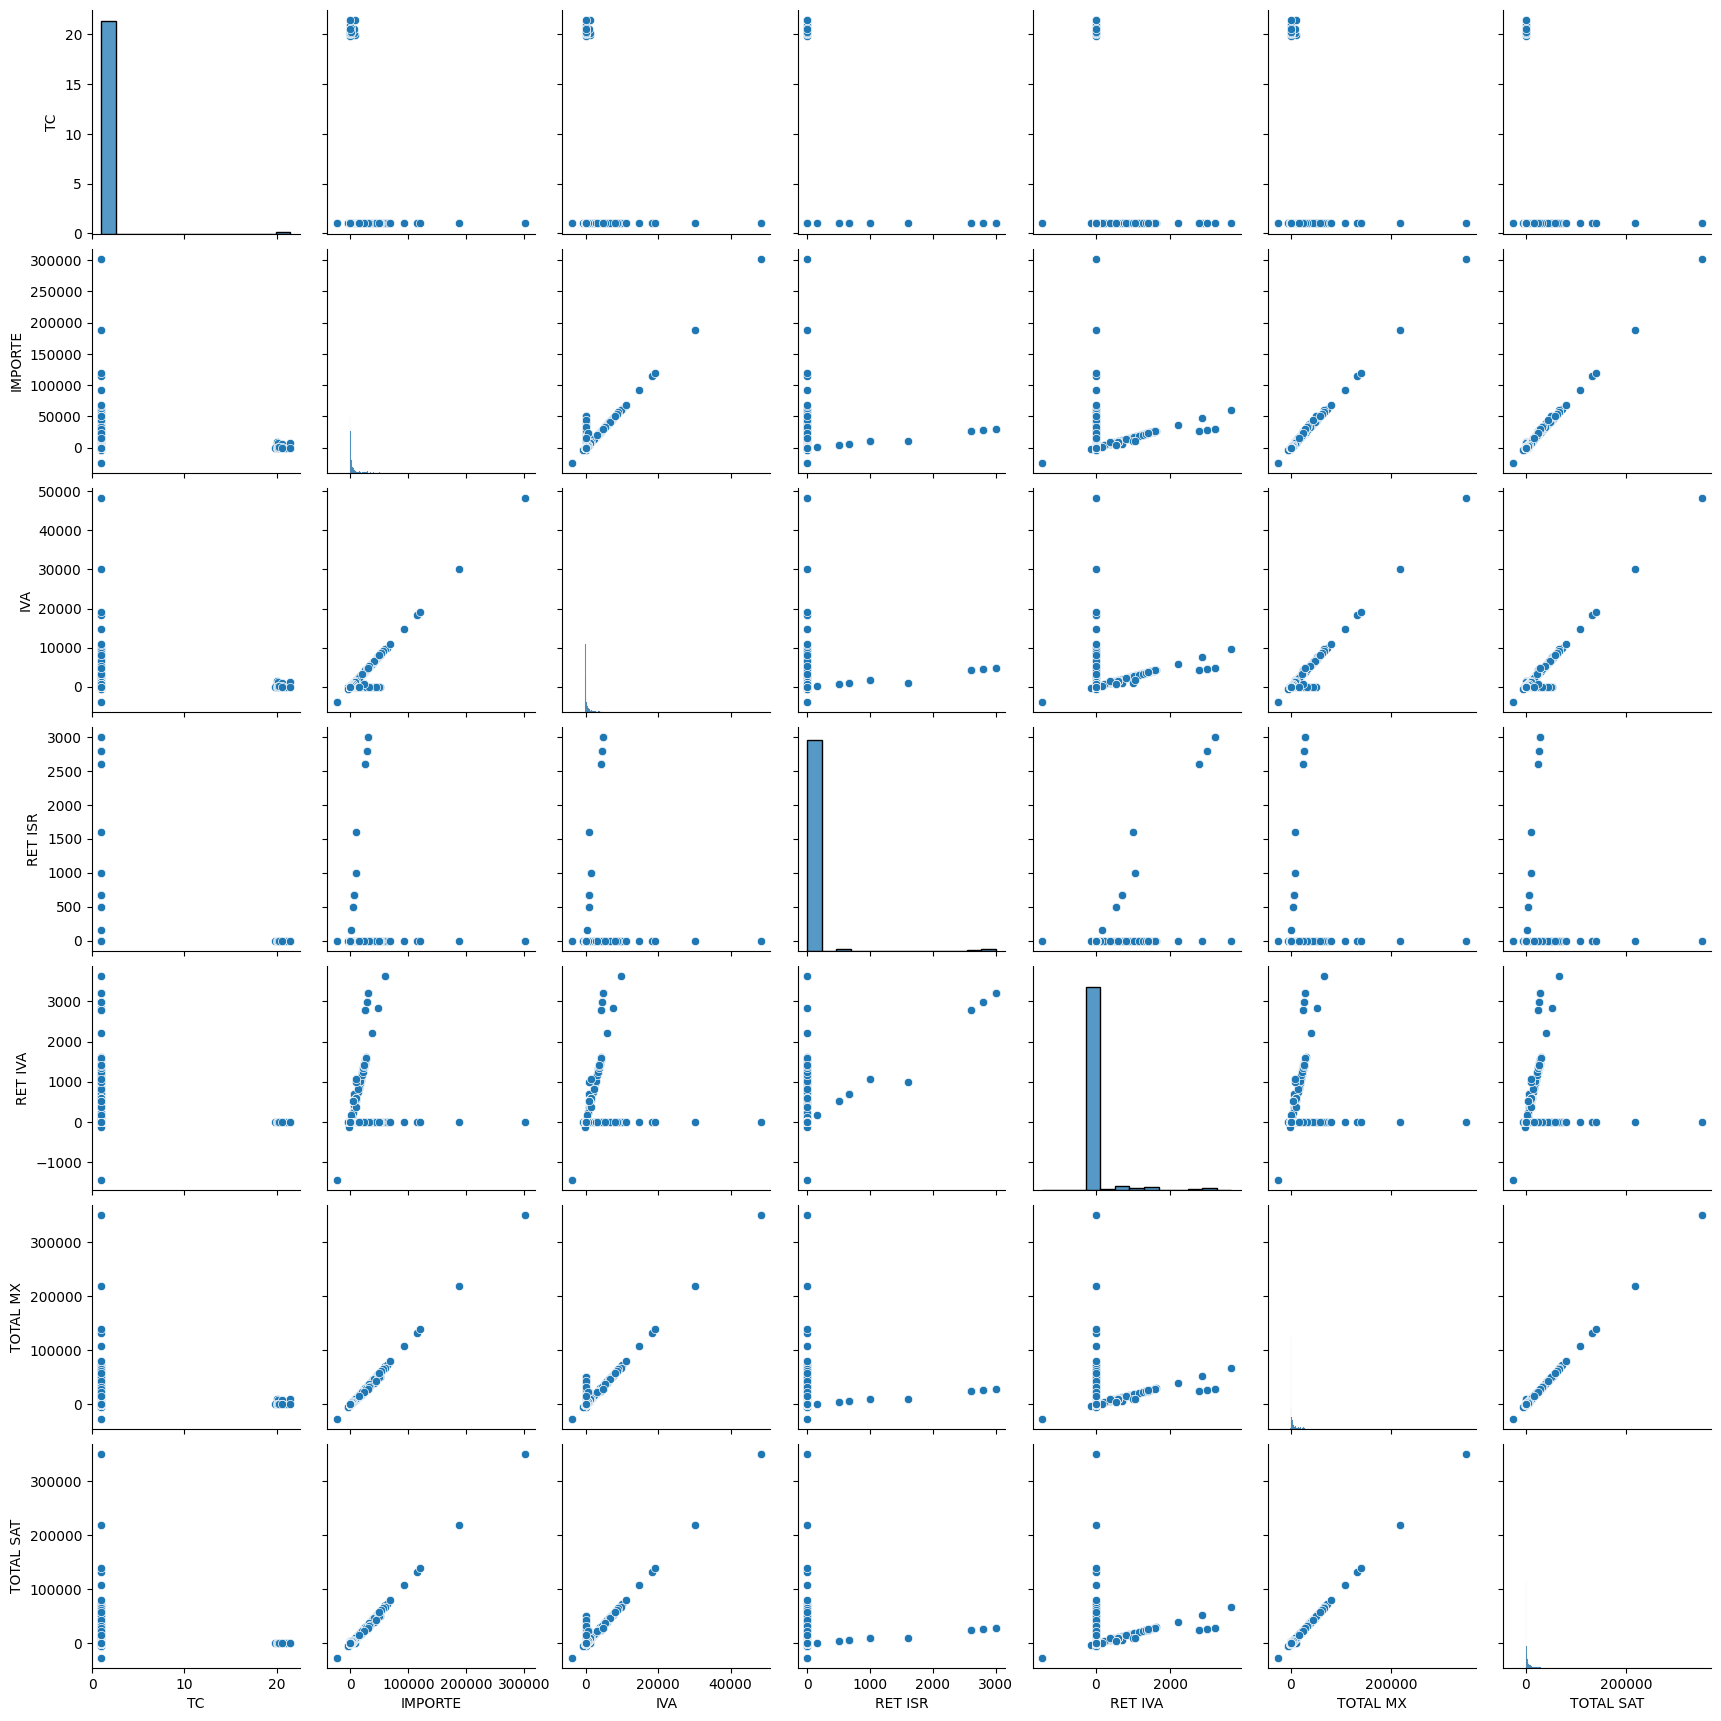

In [38]:
sns.pairplot(gastos_21)

In [39]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= gastos_21[['IVA']] #X
Var_Dep= gastos_21['TOTAL MX'] #y

In [40]:
#Redefinimos las variables 
x= Vars_Indep #es x minuscula pq solo se puede poner una variable
y= Var_Dep

In [41]:
def  func1 (x, a, b, c):
     return a*x**2 + b*x + c

In [42]:
#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, gastos_21['IVA'], gastos_21['TOTAL MX'])

In [43]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros
#a #b #c

array([1.18562517e-05, 6.74349701e+00, 7.19833444e+02])

In [44]:
#Creamos el modelo de predicción con los parámetros obtenidos 
parametros, _ = curve_fit(func1, gastos_21['IVA'], gastos_21['TOTAL MX'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a * x ** 2 + b * x + c

In [45]:
#Calculamos las predicciones y reestructuramos el vector de predicciones
#x= x.reshape(51, 1)
#y = y.reshape(51, 1)
#yfit1 = yfit1.reshape(51, 1)
yfit1

,IVA
0,1248.596485
1,1092.110605
2,4443.086243
3,6718.896169
4,6719.572625
...,...
3030,719.833444
3031,719.833444
3032,5483.812619
3033,719.833444


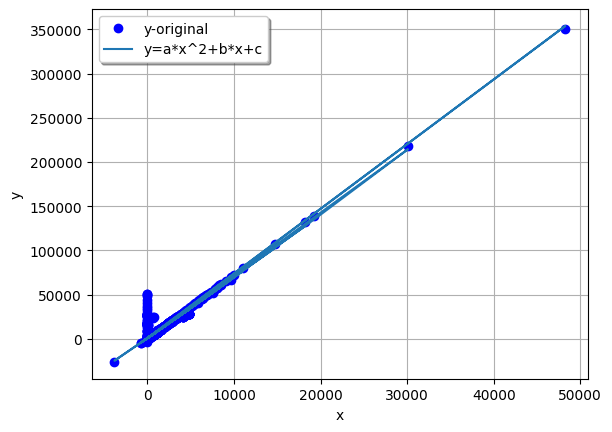

In [46]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="y=a*x^2+b*x+c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [47]:
#Calculamos el coeficiente de determinación del modelo
R2 = r2_score(y, yfit1) 
deter_.append(R2)
R2

0.9026906133200808

## **Regresión Lineal**

In [48]:
modelo_.append('Lineal')
X_.append('IVA')
Y_.append('TOTAL MX')

<Axes: xlabel='IVA', ylabel='TOTAL MX'>

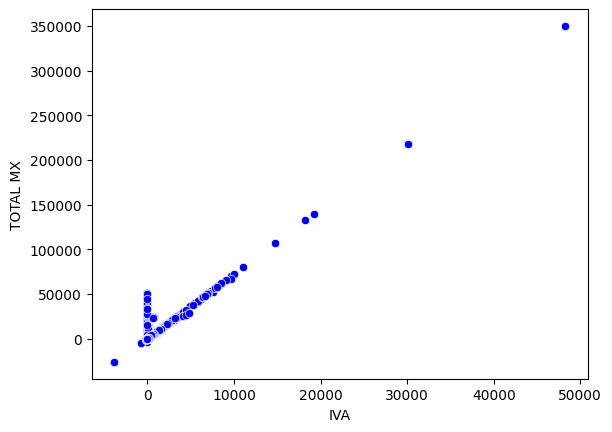

In [49]:
#Imprimimos el scatter plot entre la variable dependiente (total) e independiente (alcohol) 
#para observar el comportamiento en su dispersión 
from turtle import color

sns.scatterplot(x='IVA', y='TOTAL MX', color="blue", data=gastos_21)



#Existe una correlación alta ya que los puntos se pueden agrupar, 
#Si estuvieran más separadas no tuvieran correlación

In [50]:
#Declaramos las variables dependientes e independientes para la regresión lineal
#Vars_Indep= df[['alcohol', 'speeding']]
Vars_Indep= gastos_21[['IVA']] #X
Var_Dep= gastos_21['TOTAL MX'] #y

In [51]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [52]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [53]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)  #X, es una matriz, y es un vector

LinearRegression()

In [54]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__ 

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['IVA'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([7.00358095]),
 'rank_': 1,
 'singular_': array([89355.91292244]),
 'intercept_': 599.3018732209839}

**Modelo matemático: y= 7.00358095x + 599.3018732209839**

---




In [55]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.9017727759933463

In [56]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"

y_pred= model.predict(X=gastos_21[['IVA']])
y_pred

array([1148.38262002,  985.89954188, 4462.40709166, ..., 5540.88852278,
        599.30187322,  599.30187322])

In [57]:
#Insertamos la columna de predicciones en el DataFrame
gastos_21.insert(0, 'Predicciones', y_pred)
gastos_21

#el error varia ya que las distancias son diferentes

,Predicciones,FECHA,FOLIO,RFC,PROVEEDOR,TIPO GASTO,DESCRIPCION,MP,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT,STATUS
0,1148.382620,2021-01-01,0001010100750847116902,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,COMISION COBRADA,PUE,1.0,490.00,78.40,0.0,0.0,568.40,568.40,Vigente
1,985.899542,2021-01-01,0001010100752163714102,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,COMISION COBRADA,PUE,1.0,345.00,55.20,0.0,0.0,400.20,400.20,Vigente
2,4462.407092,2021-01-01,19788,ESI9612311E7,"ELECTRONICOS Y SIMILARES, S.A. DE C.V.",COMPRAS,MOTO E7 PLUS AZUL 64GB 4RAM,PUE,1.0,3447.41,551.59,0.0,0.0,3999.00,3999.00,Vigente
3,6820.022548,2021-01-01,211781,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006876 6/36 de 03/12/2...,PPD,1.0,5551.38,888.22,0.0,0.0,6439.60,6439.60,Vigente
4,6820.722906,2021-01-01,211782,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006877 6/36 de 03/12/2...,PPD,1.0,5551.98,888.32,0.0,0.0,6440.30,6440.30,Vigente
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3030,599.301873,2021-12-01,127043,PGM881128QIA,"PROMOCIONES GRAFICAS MEXICANAS, S.A. DE C.V.",PUBLICIDAD,Pago,--,1.0,0.00,0.00,0.0,0.0,0.00,0.00,Vigente
3031,599.301873,2021-12-01,11740,SME0510105C7,SPECTRIS MEXICO S DE RL DE CV,COMPRAS,INSULATED T/C WIRE,PUE,1.0,0.00,0.00,0.0,0.0,0.00,0.00,Vigente
3032,5540.888523,2021-12-01,1092957089,BMN930209927,BANCO MERCANTIL DEL NORTE SA INSTITUCION DE BA...,COMISION BANCARIA,SERVICIOS BANCARIOS,PUE,1.0,22826.46,705.58,0.0,0.0,23532.04,23532.04,Vigente
3033,599.301873,2021-12-01,747826,BIN940223KE0,"BANCO INVEX, S.A., INSTITUCION DE BANCA MULTIP...",COMISION BANCARIA,COMISIONES E INTERESES,PUE,1.0,0.00,0.00,0.0,0.0,0.00,0.00,Vigente


<Axes: xlabel='IVA', ylabel='TOTAL MX'>

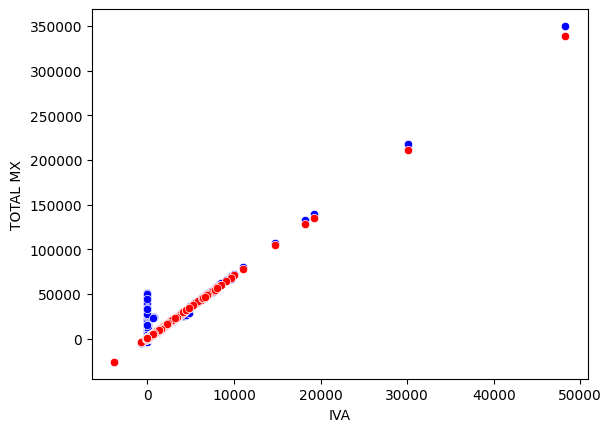

In [58]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='IVA', y='TOTAL MX', color="blue", data=gastos_21)
sns.scatterplot(x='IVA', y='Predicciones', color="red", data=gastos_21)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

#podemos saber cual va ser el comportamiento

In [59]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
deter_.append(coef_Deter)
coef_Deter

0.9017727759933463

In [61]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

#con que eficiencia esta prediciendo el modelo, en este caso con una eficiencia de 85%,
# lo que nos dice qque esta dentro de una correlacion positiva muy fuerte o positiva considerable

0.9496171733879639

#**2022**

In [ ]:
gastos_22 = pd.read_excel('gastos_c2022_clean.xlsx') 

### **MODELO lineal**

In [62]:
modelo_.append('Lineal')
X_.append('IVA')
Y_.append('TOTAL MX')

<Axes: xlabel='IVA', ylabel='TOTAL MX'>

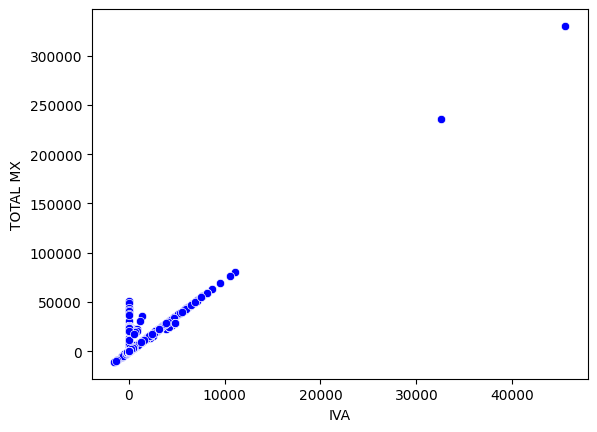

In [63]:
#Imprimimos el scatter plot entre la variable dependiente independiente 
from turtle import color

sns.scatterplot(x=gastos_22['IVA'], y=gastos_22['TOTAL MX'], color="blue", data=gastos_22)
#sns.scatterplot(X='speeding', y='total', color="red", data=df)

In [64]:
Vars_Indep= gastos_22[['IVA']]
Var_Dep= gastos_22['TOTAL MX']

In [65]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
     

In [66]:
type(model)

sklearn.linear_model._base.LinearRegression

In [67]:
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [68]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['IVA'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([6.95657338]),
 'rank_': 1,
 'singular_': array([77094.52356296]),
 'intercept_': 1008.4261757600239}

**Modelo matemático = 6.95657338x + 1008.4261757600239**

In [69]:
model.score(Vars_Indep,Var_Dep)

0.8381556146008009

In [70]:
#Predecimos los valores 
y_pred= model.predict(X=gastos_22[['IVA']])
y_pred

array([7187.39378279, 7188.08944013, 1008.42617576, ..., 1008.42617576,
       1008.42617576, 1008.42617576])

In [71]:
gastos_22.insert(0, 'Predicciones', y_pred)
gastos_22
     

,Predicciones,FECHA,FOLIO,RFC,PROOVEDOR,TIPO GASTO,DESCRIPCION,MP,TC,Importe,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT,STATUS
0,7187.393783,2022-01-01,280108,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006876 18/36 de 03/12/...,PPD,1,5551.38,888.22,0.0,0.0,6439.60,6439.60,Vigente
1,7188.089440,2022-01-01,280109,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006877 18/36 de 03/12/...,PPD,1,5551.98,888.32,0.0,0.0,6440.30,6440.30,Vigente
2,1008.426176,2022-01-01,007817297284,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,Servicios de Facturación,PUE,1,0.00,0.00,0.0,0.0,0.00,0.00,Vigente
3,1008.426176,2022-01-01,5595,ZEGC530520V4A,CARLOS ENRIQUE ZERMEÑO GUTIERREZ,COMPRAS,Pago,--,1,0.00,0.00,0.0,0.0,0.00,0.00,Vigente
4,1008.426176,2022-01-01,5614,ZEGC530520V4A,CARLOS ENRIQUE ZERMEÑO GUTIERREZ,COMPRAS,Pago,--,1,0.00,0.00,0.0,0.0,0.00,0.00,Vigente
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2572,1008.426176,2022-12-01,863376,BIN940223KE0,"BANCO INVEX, S.A., INSTITUCION DE BANCA MULTIP...",COMISION BANCARIA,COMISIONES E INTERESES,PUE,1,0.00,0.00,0.0,0.0,0.00,0.00,Vigente
2573,4600.244143,2022-12-01,1092957089,BMN930209927,BANCO MERCANTIL DEL NORTE SA INSTITUCION DE BA...,COMISION BANCARIA,SERVICIOS BANCARIOS,PUE,1,17310.30,516.32,0.0,0.0,17826.62,17826.62,Vigente
2574,1008.426176,2022-12-01,4,AAE6411055P8,Aesa Articulos Electricos S.A de C.V,COMPRAS,Pago,--,--,0.00,0.00,0.0,0.0,0.00,0.00,Vigente
2575,1008.426176,2022-12-01,16,AAE6411055P8,AESA ARTICULOS ELECTRICOS,COMPRAS,Pago,--,--,0.00,0.00,0.0,0.0,0.00,0.00,Vigente


<Axes: xlabel='IVA', ylabel='TOTAL MX'>

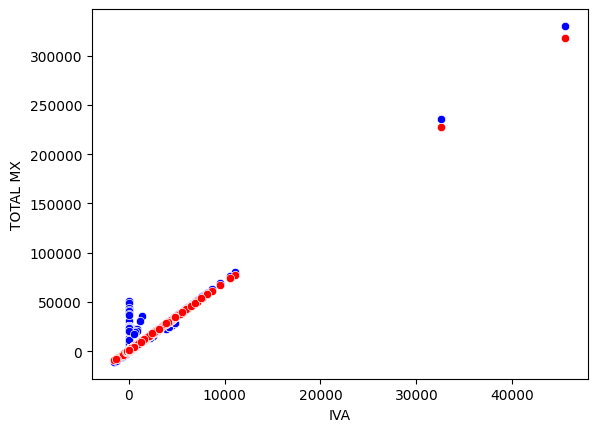

In [72]:
sns.scatterplot(x=gastos_22['IVA'], y=gastos_22['TOTAL MX'], color="blue", data=gastos_22)
sns.scatterplot(x=gastos_22['IVA'], y='Predicciones', color="red", data=gastos_22)

In [73]:
#coeficiente de determinación
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
deter_.append(coef_Deter)
coef_Deter
     

0.8381556146008009

In [74]:
#Coeficiente de correlación
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.9155083913328161

### **MODELO no lineal Cuadrático**

In [75]:
modelo_.append('No Lineal Cuadrático')
X_.append('IVA')
Y_.append('TOTAL MX')

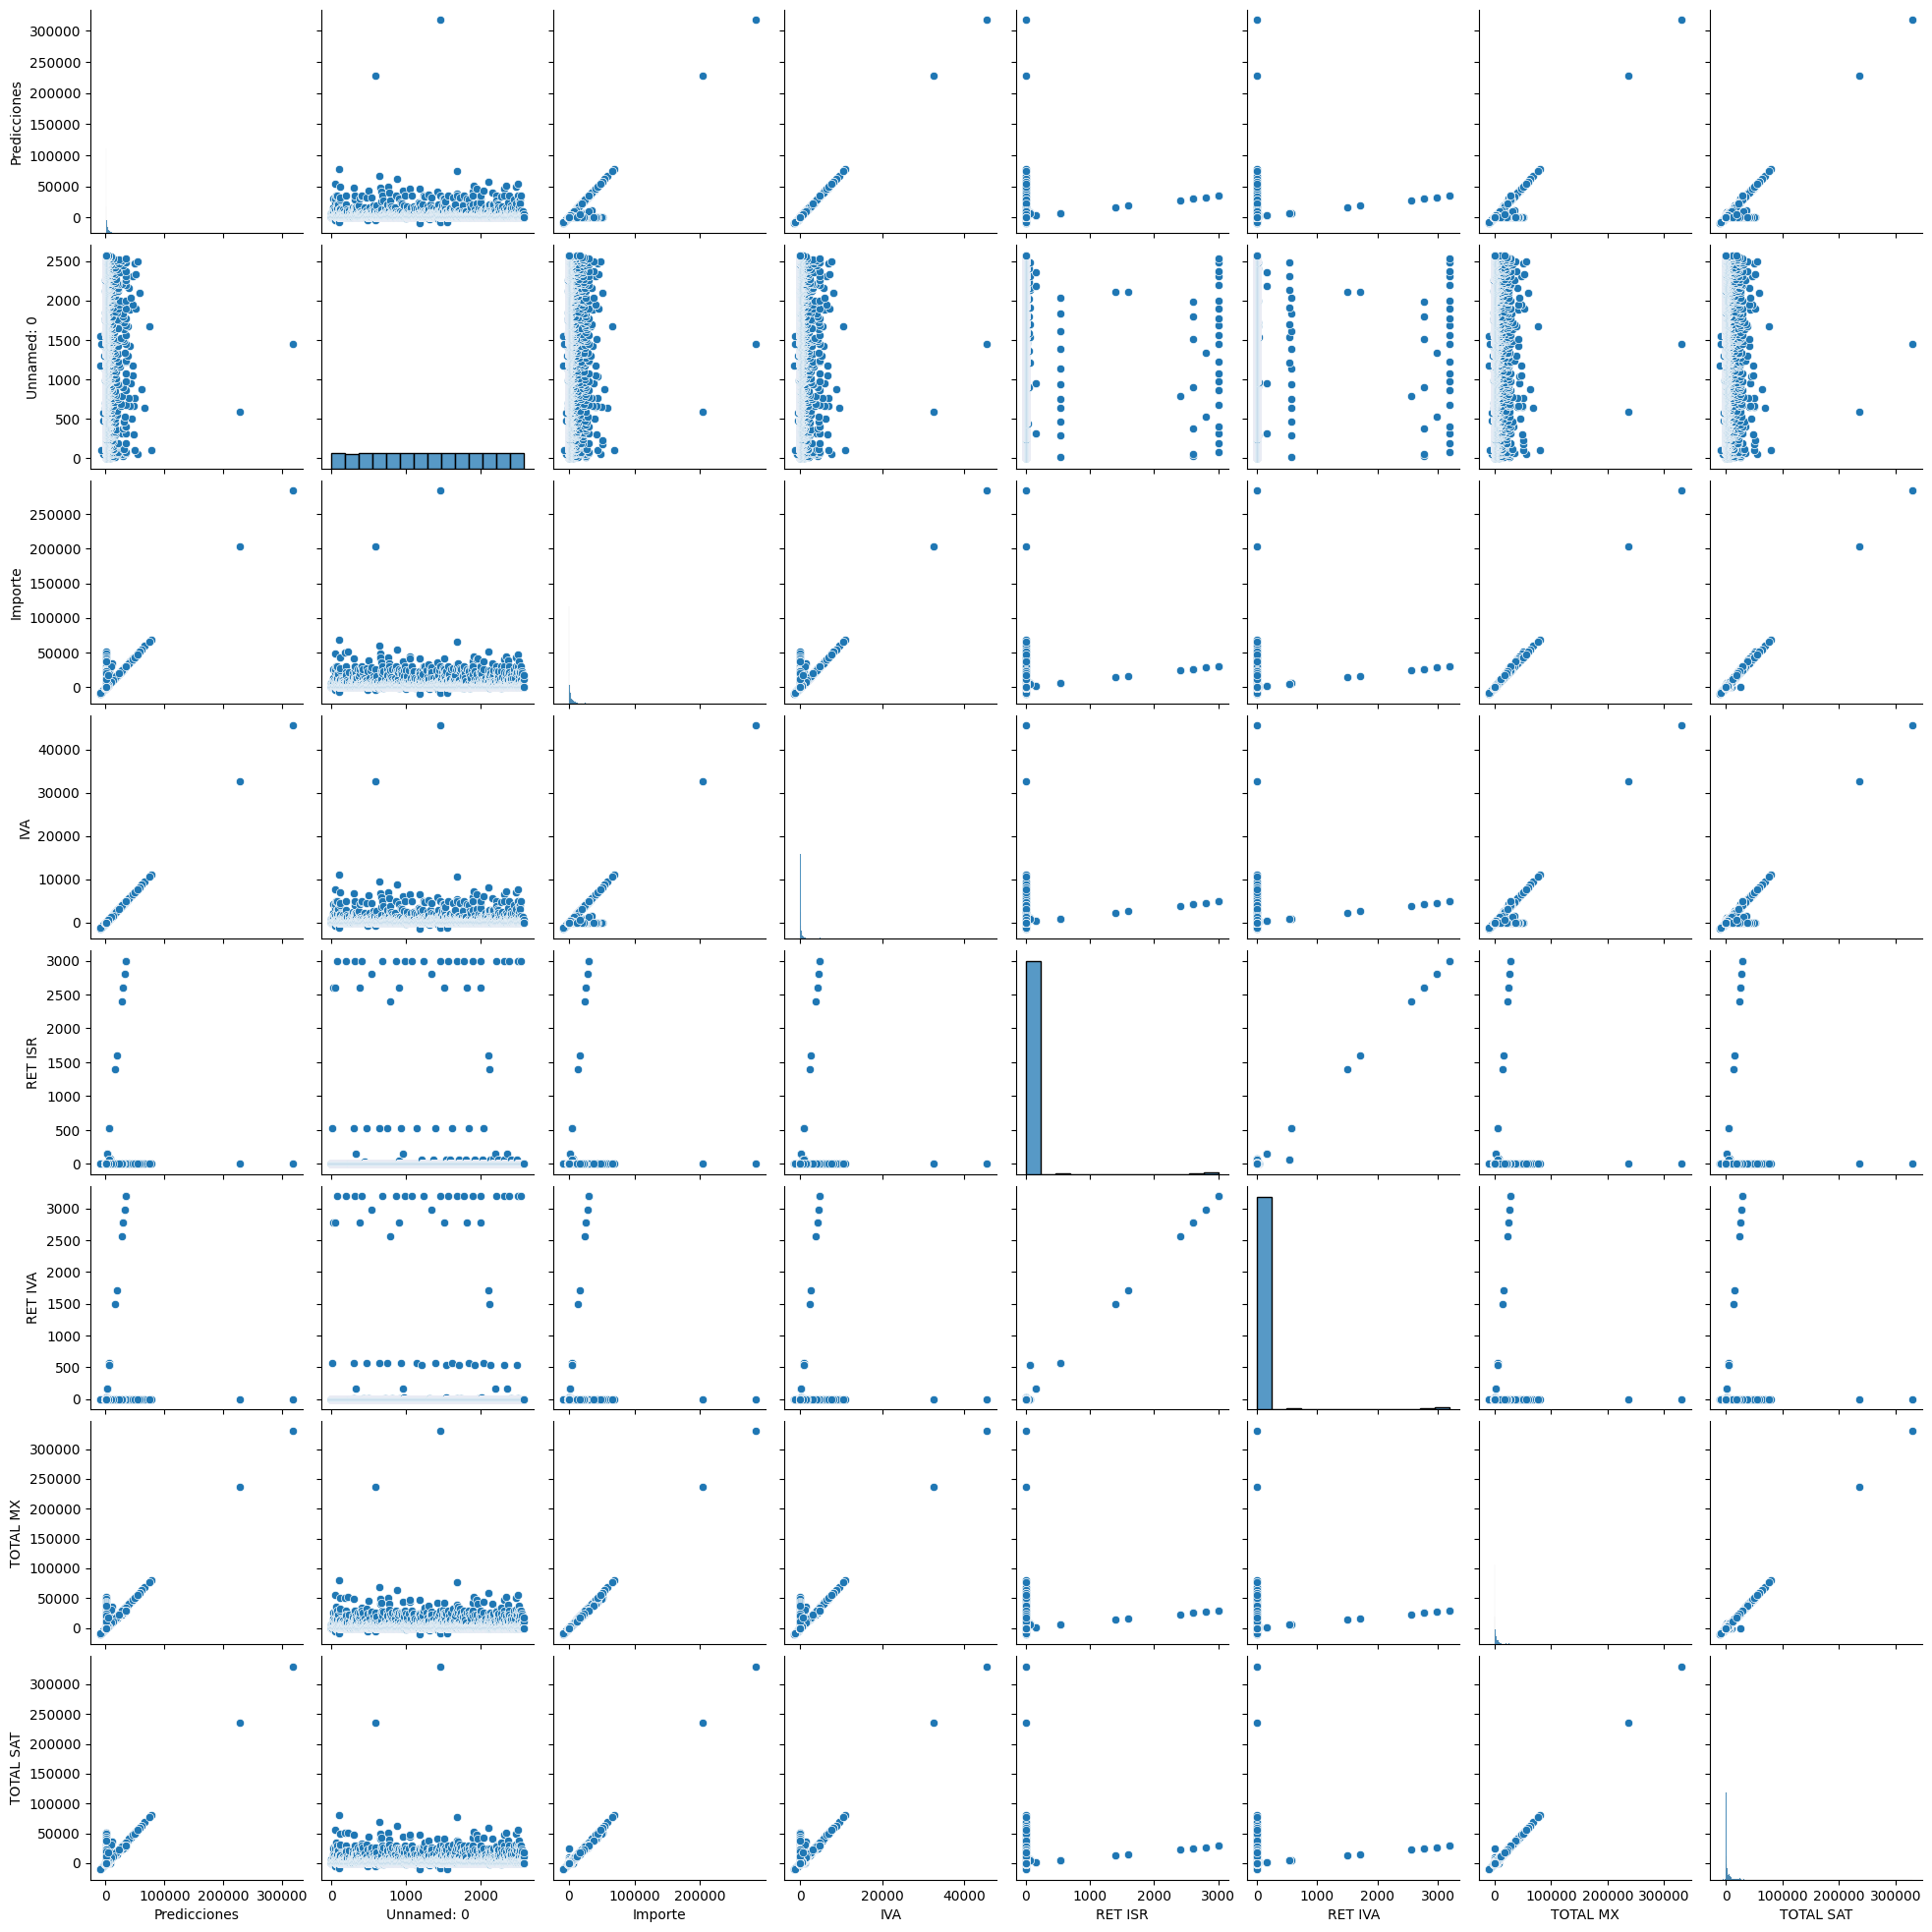

In [ ]:
#Graficamos todas las dispersiones entre todas las variables
sns.pairplot(gastos_22)

In [76]:
gastos_22.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2552 entries, 0 to 2576
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Predicciones  2552 non-null   float64       
 1   FECHA         2552 non-null   datetime64[ns]
 2   FOLIO         2552 non-null   object        
 3   RFC           2552 non-null   object        
 4   PROOVEDOR     2552 non-null   object        
 5   TIPO GASTO    2552 non-null   object        
 6   DESCRIPCION   2552 non-null   object        
 7   MP            2552 non-null   object        
 8   TC            2552 non-null   object        
 9   Importe       2552 non-null   float64       
 10  IVA           2552 non-null   float64       
 11  RET ISR       2552 non-null   float64       
 12  RET IVA       2552 non-null   float64       
 13  TOTAL MX      2552 non-null   float64       
 14  TOTAL SAT     2552 non-null   float64       
 15  STATUS        2552 non-null   object  

In [77]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= gastos_22[['IVA']]
Var_Dep= gastos_22['TOTAL MX']

In [78]:
#Redefinimos las variables 
x= Vars_Indep
y= Var_Dep

In [79]:
def  func1 (x, a, b, c):
     return a*x**2 + b*x + c

In [80]:
#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, gastos_22['IVA'], gastos_22['TOTAL MX'])

In [81]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros

array([1.57483027e-05, 6.57729600e+00, 1.15534043e+03])

In [82]:
#Creamos el modelo de predicción con los parámetros obtenidos 
parametros, _ = curve_fit(func1, gastos_22['IVA'], gastos_22['TOTAL MX'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a * x ** 2 + b * x + c

In [83]:
#Calculamos las predicciones y reestructuramos el vector de predicciones
yfit1

,IVA
0,7009.850672
1,7010.511199
2,1155.340434
3,1155.340434
4,1155.340434
...,...
2572,1155.340434
2573,4555.528188
2574,1155.340434
2575,1155.340434


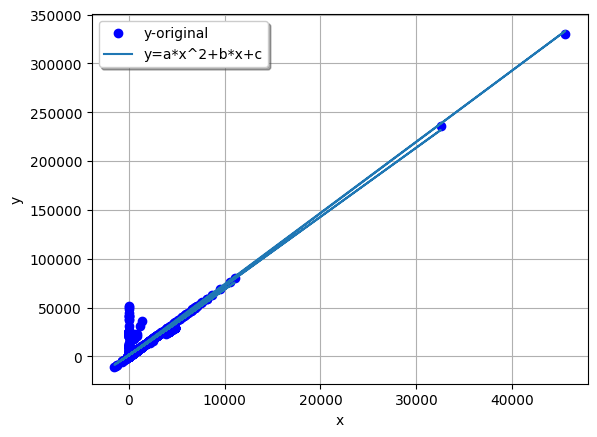

In [84]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="y=a*x^2+b*x+c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [85]:
#Calculamos el coeficiente de determinación del modelo

R2 = r2_score(y, yfit1) 
deter_.append(R2)
R2

0.8396531379463783

#**2023**

In [89]:
df = pd.read_excel('Gastos y costos 20-23 (2).xlsx', sheet_name='2023')
df.head()

,Fecha,Folio,UUID,RFC,Proveedor,TIPO GASTO,Descripción,MP,FP,TC,Importe,IVA,RET ISR,RET IVA,Otros,TOTAL MX,TOTAL SAT,Tipo,Status,Poliza
0,2023-01-01,31,49536321-60A4-523E-A32F-E8BDF5C2276E,AAE6411055P8,AESA ARTICULOS ELECTRICOS,COMPRAS,Pago,NaN,NaN,1.0,0.00,0.00,0.0,0.0,NaN,0.00,0.00,P,Vigente,NaN
1,2023-01-01,38,20FBB63B-D550-512F-9668-EEC6F983CEB7,AAE6411055P8,AESA ARTICULOS ELECTRICOS,COMPRAS,Pago,NaN,NaN,1.0,0.00,0.00,0.0,0.0,NaN,0.00,0.00,P,Vigente,NaN
2,2023-01-01,341932,DB8C4388-D4E0-4F0C-A09C-77C773257F44,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006876 30/36 de 03/12/...,PPD,99.0,1.0,5551.38,888.22,0.0,0.0,NaN,6439.60,6439.60,I,Vigente,PE01-ENE23
3,2023-01-01,341933,A81A63F5-D5EC-4601-803E-375AF9CC5021,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006877 30/36 de 03/12/...,PPD,99.0,1.0,5551.98,888.32,0.0,0.0,NaN,6440.30,6440.30,I,Vigente,PE02-ENE23
4,2023-01-01,342205,DCC10492-DE51-4C87-8430-5676FBF81931,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000009486 5/48 de 03/12/2...,PPD,99.0,1.0,8454.37,1352.70,0.0,0.0,NaN,9807.07,9807.07,I,Vigente,PE03-ENE23


In [90]:
df.isnull().sum()

Fecha            0
Folio           13
UUID             0
RFC              0
Proveedor        0
TIPO GASTO       8
Descripción      0
MP              71
FP              71
TC               0
Importe          0
IVA              0
RET ISR          0
RET IVA          0
Otros          397
TOTAL MX         0
TOTAL SAT        0
Tipo             0
Status           0
Poliza         115
dtype: int64

In [91]:
Y = df.select_dtypes(include=[np.float, np.int])
x = df.select_dtypes(include=[np.object])

<ipython-input-91-8b94f98b8969>:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y = df.select_dtypes(include=[np.float, np.int])
<ipython-input-91-8b94f98b8969>:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y = df.sele

In [92]:
Y = Y.fillna(0)
x=x.fillna('--')

In [93]:
df=pd.merge(Y,x, left_index=True, right_index=True)

In [94]:
valores_nulos=df.isnull().sum().sum()
valores_nulos

0

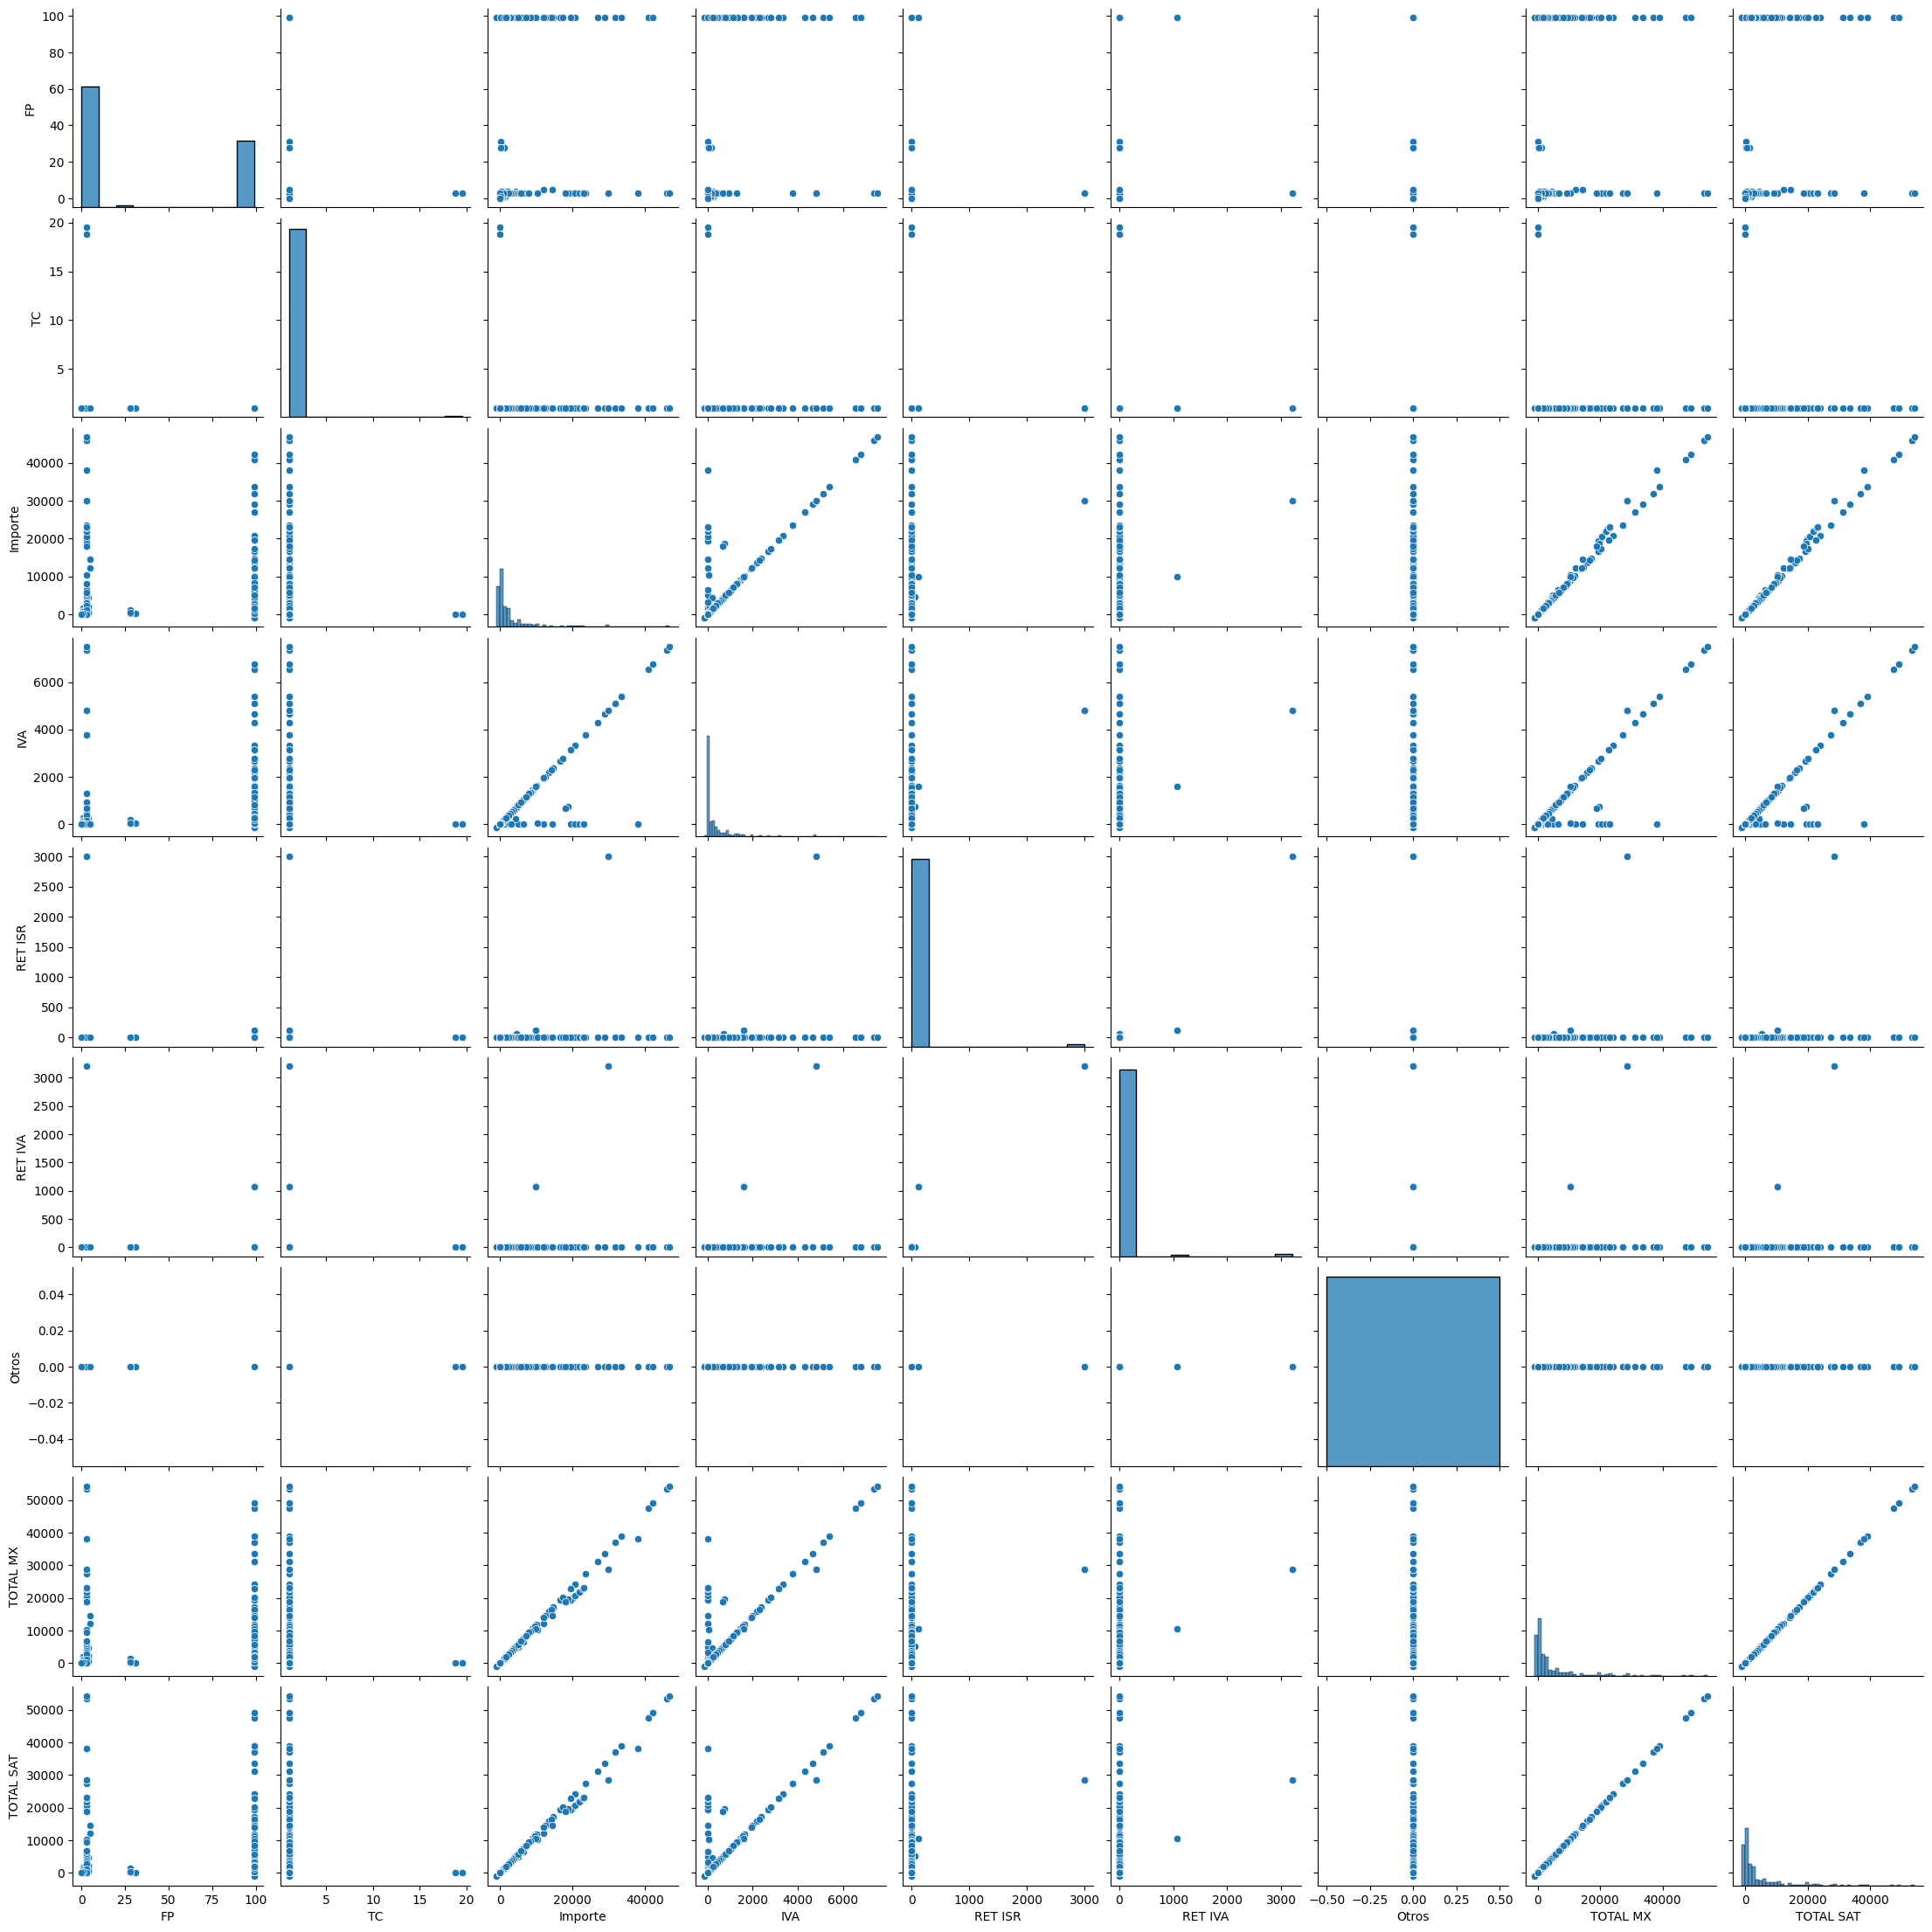

In [ ]:
sns.pairplot(df)

Total MX (variable objetivo) & IVA (variable independiente)

In [95]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df[['IVA']]
Var_Dep= df[['TOTAL MX']]

In [96]:
#Redefinimos las variables 
x= Vars_Indep
y= Var_Dep

##**Modelo 1- No Lineal Polinómica**

In [86]:
modelo_.append('No Lineal Polinómica')
X_.append('IVA')
Y_.append('TOTAL MX')

In [87]:
def func2(x, a, b, c):
    return a*x**3 + b*(x**2) + c

In [97]:
#Ajustamos los parámetros de la función curve_fit
parametros2, covs2= curve_fit(func2, df['IVA'], df['TOTAL MX'])

In [98]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros2

array([-2.45729716e-07,  2.67882215e-03,  2.19703574e+03])

In [99]:
#Creamos el modelo de predicción con los parámetros obtenidos 
parametros2, _ = curve_fit(func2, df['IVA'], df['TOTAL MX'])
a2, b2, c2 = parametros2[ 0 ], parametros2[ 1 ], parametros2[ 2 ]
yfit2 = a2*np.exp(x*b2)+c2

In [100]:
#Calculamos las predicciones y reestructuramos el vector de predicciones
#yfit2 = yfit2.reshape(51, 1)
yfit2

,IVA
0,2197.035736
1,2197.035736
2,2197.035733
3,2197.035733
4,2197.035727
...,...
392,2197.035736
393,2197.035736
394,2197.035734
395,2197.035736


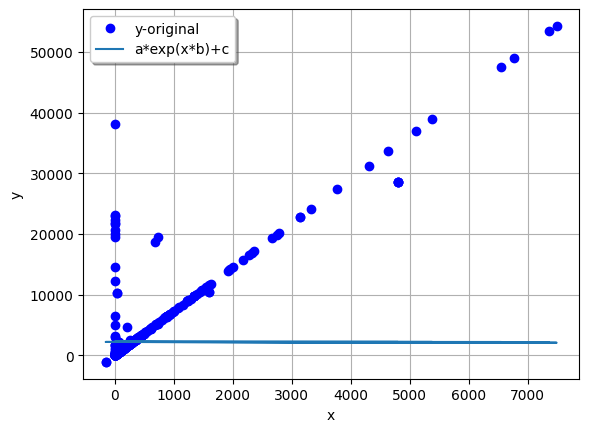

In [101]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit2, label="a*exp(x*b)+c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [102]:
#Calculamos el coeficiente de determinación del modelo
R2 = r2_score(y, yfit2) 
deter_.append(R2)
R2

-0.06876966246491545

##**Modelo 2 - Regresión Lineal**

In [103]:
modelo_.append('Lineal')
X_.append('IVA')
Y_.append('TOTAL MX')

In [104]:
#Encontramos la correlación entre las variables  
Corr_Factors=df[['IVA', 'TOTAL MX']].corr()
Corr_Factors

,IVA,TOTAL MX
IVA,1.000000,0.882287
TOTAL MX,0.882287,1.000000


In [105]:
#Encontramos el valor absoluto de todas las correlaciones entre las variables 
Corr_Factors1= abs(Corr_Factors)
Corr_Factors1

,IVA,TOTAL MX
IVA,1.000000,0.882287
TOTAL MX,0.882287,1.000000


<Axes: >

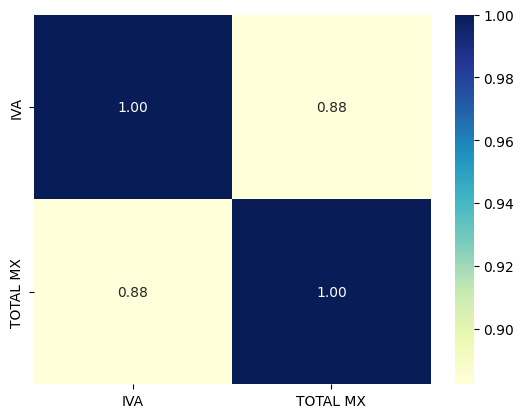

In [106]:
#Graficamos el mapa de los coeficientes de correlación 
Heat_Map= sns.heatmap(Corr_Factors1, cmap = 'YlGnBu', annot=True, fmt=".2f")  
Heat_Map

<Axes: xlabel='IVA', ylabel='TOTAL MX'>

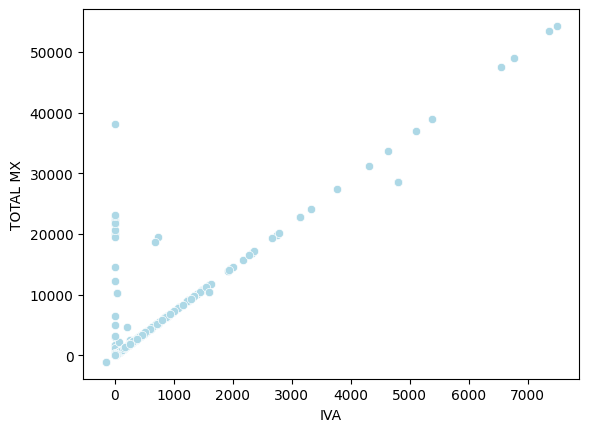

In [107]:
from turtle import color
sns.scatterplot(x=df['IVA'], y=df['TOTAL MX'], color="lightblue", data=df)

In [108]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()
type(model)

sklearn.linear_model._base.LinearRegression

In [109]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [110]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [111]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['IVA'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[6.72055268]]),
 'rank_': 1,
 'singular_': array([21653.34448675]),
 'intercept_': array([1010.28755311])}

 Modelo matemático:y= 6.72055268 + 1010.28755311

---




In [112]:
y_pred= model.predict(X=x)
y_pred

array([[ 1.01028755e+03],
       [ 1.01028755e+03],
       [ 6.97961686e+03],
       [ 6.98028891e+03],
       [ 1.01011792e+04],
       [ 1.53717888e+03],
       [ 1.01028755e+03],
       [ 5.89545730e+03],
       [ 1.01028755e+03],
       [ 1.01028755e+03],
       [ 1.01028755e+03],
       [ 1.01028755e+03],
       [ 1.01028755e+03],
       [ 1.01028755e+03],
       [ 1.25968726e+03],
       [ 1.01028755e+03],
       [ 1.01028755e+03],
       [ 3.70711093e+03],
       [ 1.47051100e+03],
       [ 1.01028755e+03],
       [ 1.01028755e+03],
       [ 1.01028755e+03],
       [ 1.01028755e+03],
       [ 3.40065373e+03],
       [ 3.11785287e+03],
       [ 1.01028755e+03],
       [ 3.40999530e+03],
       [ 1.12621709e+03],
       [ 2.57160635e+03],
       [ 1.30814245e+03],
       [ 1.01028755e+03],
       [ 1.94622370e+04],
       [ 1.66056823e+03],
       [ 1.01028755e+03],
       [ 1.01028755e+03],
       [ 1.01028755e+03],
       [ 1.44745951e+03],
       [ 8.37379551e+03],
       [ 1.3

In [113]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(0, 'Predicciones', y_pred)
df[['IVA','TOTAL MX','Predicciones']]


,IVA,TOTAL MX,Predicciones
0,0.00,0.00,1010.287553
1,0.00,0.00,1010.287553
2,888.22,6439.60,6979.616858
3,888.32,6440.30,6980.288913
4,1352.70,9807.07,10101.179168
...,...,...,...
392,0.00,0.00,1010.287553
393,0.00,220.00,1010.287553
394,682.40,18753.92,5596.392704
395,0.00,14472.32,1010.287553


<Axes: xlabel='IVA', ylabel='TOTAL MX'>

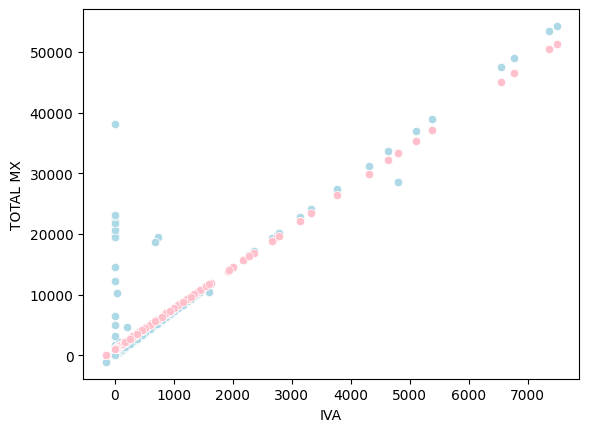

In [114]:
sns.scatterplot(x= df['IVA'], y= df['TOTAL MX'], color="lightblue", data=df)
sns.scatterplot(x=x.columns[0], y='Predicciones', color="pink", data=df)

In [115]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
deter_.append(coef_Deter)
coef_Deter

0.7784301734139256

In [116]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.8822868997179577

#**Tabla de coeficientes**

In [117]:
tabla = pd.DataFrame()

In [120]:
Año_=['2020','2020','2021','2021','2022','2022','2023','2024']

In [132]:
tabla['Año']=Año_
tabla['Modelo']= modelo_
tabla['X']= X_
tabla['Y']= Y_
tabla['Coef Determinación']= deter_

In [133]:
tabla

,Año,Modelo,X,Y,Coef Determinación
0,2020,Lineal,IVA,TOTAL MX,0.761728
1,2020,No lineal Cuadrático,IVA,TOTAL MX,0.932907
2,2021,No Lineal Cuadrática,IVA,TOTAL MX,0.902691
3,2021,Lineal,IVA,TOTAL MX,0.901773
4,2022,Lineal,IVA,TOTAL MX,0.838156
5,2022,No Lineal Cuadrático,IVA,TOTAL MX,0.839653
6,2023,No Lineal Polinómica,IVA,TOTAL MX,-0.068770
7,2024,Lineal,IVA,TOTAL MX,0.778430
